In [127]:
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import re
# Add the parent directory to the system path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, parent_dir)

In [128]:
def sort_key(filename):
    numbers = re.findall(r'\d+', filename)
    return [int(num) for num in numbers]

In [129]:
#loading of data
exp_dir = 'Experiment 10005' #cave "47" #horizontal 37 #deadend 4
test_scen = "horizontal"
test_nr = 1
agent = "locked_conv"

retrieve_depth_maps_path = os.path.join(parent_dir, 'log', 'LV_VAE_MESH-v0', exp_dir , test_scen, "tests", f"test{test_nr}", "depth_maps", "depth_map_*.png")
retrieve_flight_imgs_path = os.path.join(parent_dir, 'plotting', 'replotting_results', "follow_quad_imgs" , test_scen, f"test{test_nr}", "scene_timestep_*.png")

output_path = os.path.join(parent_dir, 'plotting', 'replotting_results', "depth_and_flight" , agent, test_scen)
os.makedirs(output_path, exist_ok=True)


In [130]:
#load one empty depth map to pad when no depth map is available
edm_path = os.path.join(parent_dir, 'plotting', 'replotting_results',"empty_depth_map.png")
empty_depth_map = cv2.imread(edm_path, cv2.IMREAD_UNCHANGED)
empty_depth_map = cv2.cvtColor(empty_depth_map, cv2.COLOR_BGR2RGB)
#display empty depth map
# plt.imshow(empty_depth_map)


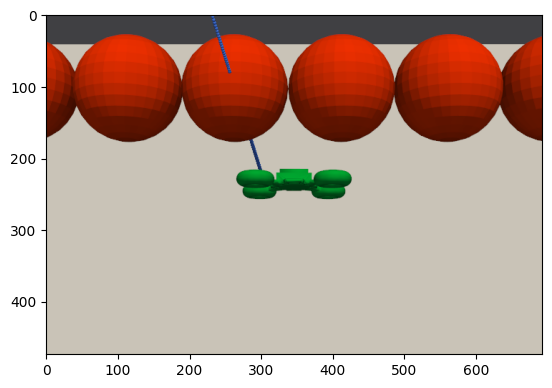

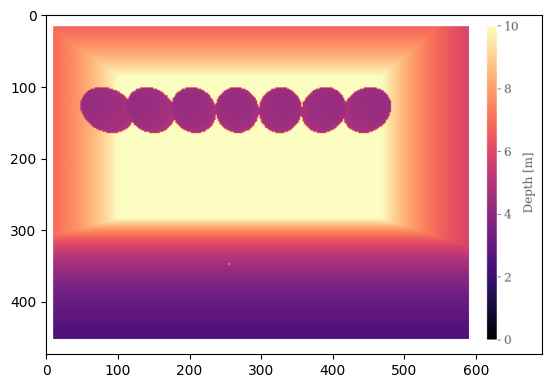

In [131]:
# Load the depth maps
depth_maps = []
flight_imgs = []

depth_map_files = sorted(glob.glob(retrieve_depth_maps_path), key=sort_key)
flight_img_files = sorted(glob.glob(retrieve_flight_imgs_path), key=sort_key)

if len(depth_map_files) != len(flight_img_files):
    dm_indices = []
    for p in depth_map_files:
        dm_indices.append(sort_key(p)[3])

    for flight_img_path in flight_img_files:
        flight_img_num = sort_key(flight_img_path)[1]+1 #+1 since depth maps start at 1

        if flight_img_num in dm_indices:
            depth_map_path = depth_map_files[dm_indices.index(flight_img_num)]
            depth_map = cv2.imread(depth_map_path, cv2.IMREAD_UNCHANGED)
            depth_map = cv2.cvtColor(depth_map, cv2.COLOR_BGR2RGB)
        else:
            depth_map = empty_depth_map

        flight_img = cv2.imread(flight_img_path, cv2.IMREAD_UNCHANGED)
        flight_img = cv2.cvtColor(flight_img, cv2.COLOR_BGR2RGB)

        depth_maps.append(depth_map)
        flight_imgs.append(flight_img)   
else:
    for depth_map_path in depth_map_files:
        depth_map = cv2.imread(depth_map_path, cv2.IMREAD_UNCHANGED)
        depth_map = cv2.cvtColor(depth_map, cv2.COLOR_BGR2RGB)
        depth_maps.append(depth_map)

    for flight_img_path in flight_img_files:
        flight_img = cv2.imread(flight_img_path, cv2.IMREAD_UNCHANGED)
        flight_img = cv2.cvtColor(flight_img, cv2.COLOR_BGR2RGB)
        flight_imgs.append(flight_img)

plt.figure()
plt.imshow(flight_imgs[0])

plt.figure()
plt.imshow(depth_maps[0])

In [132]:
#Ensure that the number of depth maps and flight images are the same
assert len(depth_maps) == len(flight_imgs)

In [133]:
#concatenate the images side by side
for i in range(len(depth_maps)):
    depth_map = depth_maps[i]
    flight_img = flight_imgs[i]
    combined_img = np.concatenate((depth_map, flight_img), axis=1)
    combined_img = cv2.cvtColor(combined_img, cv2.COLOR_BGR2RGB)
    cv2.imwrite(os.path.join(output_path, f"combined_img_{i}.png"), combined_img)
    print(f"Saved combined image {i}")

Saved combined image 0
Saved combined image 1
Saved combined image 2
Saved combined image 3
Saved combined image 4
Saved combined image 5
Saved combined image 6
Saved combined image 7
Saved combined image 8
Saved combined image 9
Saved combined image 10
Saved combined image 11
Saved combined image 12
Saved combined image 13
Saved combined image 14
Saved combined image 15
Saved combined image 16
Saved combined image 17
Saved combined image 18
Saved combined image 19
Saved combined image 20
Saved combined image 21
Saved combined image 22
Saved combined image 23
Saved combined image 24
Saved combined image 25
Saved combined image 26
Saved combined image 27
Saved combined image 28
Saved combined image 29
Saved combined image 30
Saved combined image 31
Saved combined image 32
Saved combined image 33
Saved combined image 34
Saved combined image 35
Saved combined image 36
Saved combined image 37
Saved combined image 38
Saved combined image 39
Saved combined image 40
Saved combined image 41
Sa